#  **Hacktiv8 Assignment Project 3**

Nama  : Febriansyah Permana

Kelas : KS-18

# Bank Market Data set

# **1.  Data Preparation**



In [23]:
#Import Liblary

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import statsmodels.api as sm

In [27]:
#upload Dataset

from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [28]:
# open data

df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [32]:
df.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [34]:
df.shape

(41188, 21)

In [35]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [36]:
df.index.values

array([    0,     1,     2, ..., 41185, 41186, 41187])

In [37]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [38]:
df.describe(include = object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [39]:
# Cek kolom yang termasuk categorical
print('Nama Kolom')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Nama Kolom
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3
y 2


In [40]:
#mengkategorikan nama kolom berdasarkan tipe data
columns_numerical = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
columns_categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
columns_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
columns_target = ['y']

In [41]:
df.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

# **2.  Data Cleaning**

In [42]:
# Cek Missing Value
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [43]:
# Mengganti isi dataframe yang unknown dengan nan
from numpy import nan

df = df.replace('unknown', nan)
print(df.isnull().sum())

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [44]:
# Karena categorical, isi NaN dengan modus
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['marital'].fillna(df['marital'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['default'].fillna(df['default'].mode()[0], inplace=True)
df['housing'].fillna(df['housing'].mode()[0], inplace=True)
df['loan'].fillna(df['loan'].mode()[0], inplace=True)

In [45]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [46]:
df.duplicated().any()

True

In [47]:
# jumlah duplikasi data
df.duplicated().sum()

14

In [48]:
# menghapus duplikasi data pada dataset
df.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [49]:
# Mengurutkan index setelah penghapusan
df = df.drop_duplicates().reset_index(drop=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [50]:
df.shape

(41174, 21)

In [51]:
df.duplicated().any()

False

# **3.  Visualization**

**3.1 Pie chart Presentase Client yang Subscribe Deposit**

In [52]:
df_deposit = df['y'].value_counts()
df_deposit

no     36535
yes     4639
Name: y, dtype: int64

In [53]:
labels = df['y'].unique()
labels

array(['no', 'yes'], dtype=object)

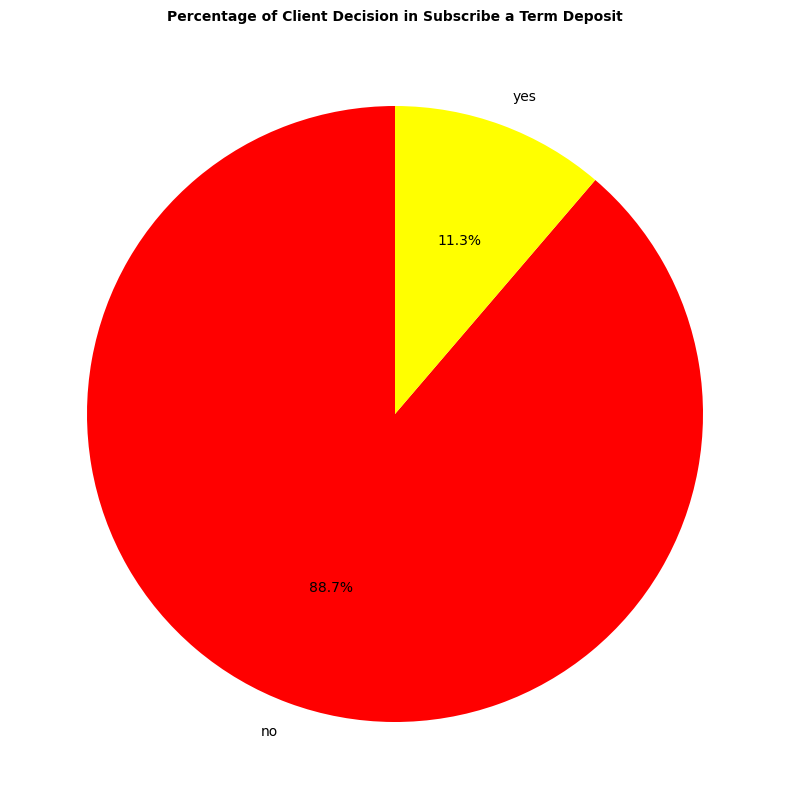

In [57]:
plt.figure(figsize=(10,10))
colors=['red','yellow']
font = {'weight': 'bold','size': 10,}
ax = plt.axes()
plt.title('Percentage of Client Decision in Subscribe a Term Deposit', fontdict=font)
ab = plt.pie(df_deposit, labels=labels, colors=colors, startangle=90,autopct='%1.1f%%')
plt.show()

Dari pie chart di atas dapat dilihat bahwa sebanyak 88.7% memilih untuk tidak menggunakan deposit dan hanya 11.3% yang memilih menggunakan deposit.

**3.2  Bar Chart berdasarkan Education Column dengan melihat banyaknya data di Deposit Column(y)**

In [58]:
df_edu = df.groupby('education', axis=0).sum()
df_edu

<ipython-input-58-01da1ebc5961>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_edu = df.groupby('education', axis=0).sum()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic.4y,198707,1105785,10859,4031785,614,900.6,391023.103,-168005.3,15662.528,21585250.5
basic.6y,92670,605914,5858,2246005,296,528.7,214551.949,-94228.7,8642.728,11855262.8
basic.9y,236125,1579509,15308,5918860,855,962.6,565953.446,-249820.2,22354.188,31266517.3
high.school,361427,2482148,24435,9172873,1769,312.4,890179.473,-389424.3,33825.484,49129369.6
illiterate,873,4982,41,16989,2,-2.4,1679.712,-719.1,63.298,93092.0
professional.course,210040,1323449,13555,5034299,855,902.9,490305.515,-210249.2,19439.030,27091443.5
university.degree,548089,3534430,35677,13207642,2733,-234.1,1299193.206,-555226.6,49113.298,71726473.0


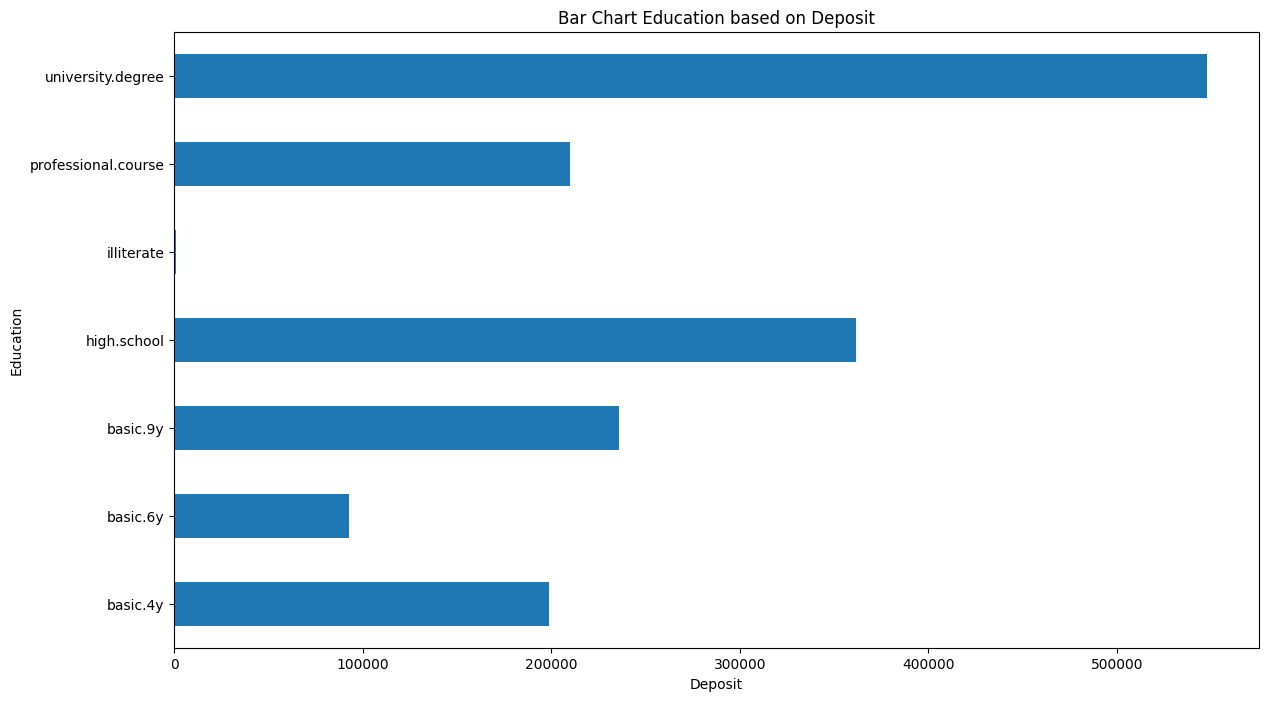

In [62]:
df_edu['age'].plot(kind="barh",figsize =(14,8)) # Generate plot

plt.title('Bar Chart Education based on Deposit') # add title to the plot
plt.ylabel('Education') # add to x-label to the plot
plt.xlabel('Deposit') # add y-label to the plot

plt.show()

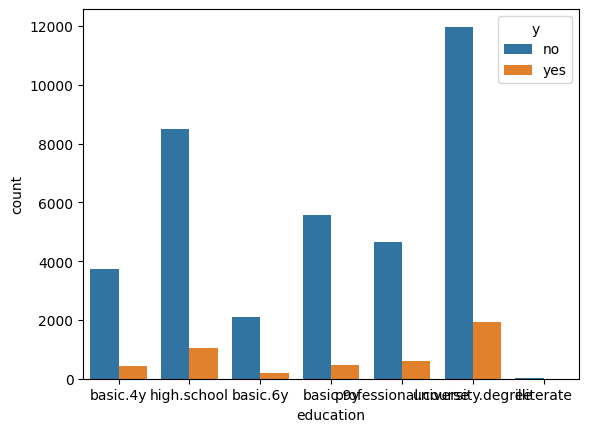

In [66]:
sns.countplot(x='education', hue='y', data=df)
plt.show()

Yang paling banyak memutuskan untuk subscribe deposit yaitu dari kalangan education 6.

**Preprocessing**

In [67]:
encoder = preprocessing.LabelEncoder()

In [68]:
for col in columns_categorical:
    df[col] = encoder.fit_transform(df[col]) # mentransformasi data categori

In [69]:
df['y'] = encoder.fit_transform(df['y'])

In [70]:
df.info

<bound method DataFrame.info of        age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        0        0     0        1      6   
2       37    7        1          3        0        1     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     1        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41169   73    5        1          5        0        1     0        0      7   
41170   46    1        1          5        0        0     0        0      7   
41171   56    5        1          6        0        1     0        0      7   
41172   44    9        1          5        0        0     0        0      7   
41173   74    5        1          5        0        1     0        0      7   

       day_of_week 

In [71]:
# scaler numeric coloumns
df[columns_numerical] = StandardScaler().fit_transform(df[columns_numerical])

In [72]:
df.head

<bound method NDFrame.head of             age  job  marital  education  default  housing  loan  contact  \
0      1.533179    3        1          0        0        0     0        1   
1      1.629144    7        1          3        0        0     0        1   
2     -0.290159    7        1          3        0        1     0        1   
3     -0.002263    0        1          1        0        0     0        1   
4      1.533179    7        1          3        0        0     1        1   
...         ...  ...      ...        ...      ...      ...   ...      ...   
41169  3.164586    5        1          5        0        1     0        0   
41170  0.573528    1        1          5        0        0     0        0   
41171  1.533179    5        1          6        0        1     0        0   
41172  0.381597    9        1          5        0        0     0        0   
41173  3.260551    5        1          5        0        1     0        0   

       month  day_of_week  ...  campaign     

In [73]:
# Memilih dan memisahkan feature dan target

# pilih feature
X = df.drop('y', axis=1)
# pilih target
y = df['y']

In [74]:
# split data 80% training 20% test
X_train, X_test, y_train, y_test = train_test_split(X , y,
                                                    shuffle = True,
                                                    test_size=0.2,
                                                    random_state=1)

print('Dimensi training feature:', X_train.shape)
print('Dimensi testing feature:', X_test.shape)
print('Dimensi training label:', y_train.shape)
print('Dimensi training label:', y_test.shape)

Dimensi training feature: (32939, 20)
Dimensi testing feature: (8235, 20)
Dimensi training label: (32939,)
Dimensi training label: (8235,)


# **4. Modeling**

**4.1 Logistic Regression**

In [75]:
# Modelling
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


In [76]:
# Skor Akurasi
print(accuracy_score(y_test, y_pred))

0.9063752276867031


In [77]:
# confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[7075  179]
 [ 592  389]]


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7254
           1       0.68      0.40      0.50       981

    accuracy                           0.91      8235
   macro avg       0.80      0.69      0.73      8235
weighted avg       0.89      0.91      0.90      8235



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

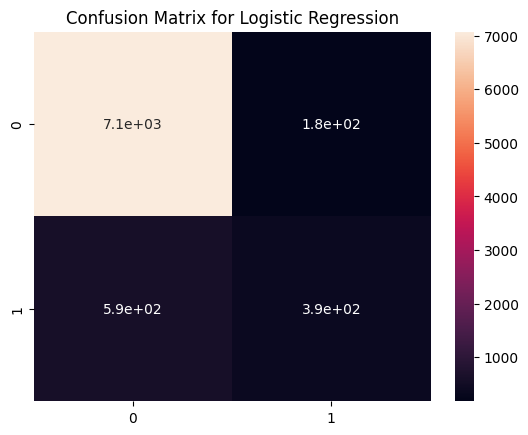

In [79]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title('Confusion Matrix for Logistic Regression')

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 7075 prediksi true negatif

* 592 prediksi false negatif

* 179 prediksi false positif

* 389 prediksi true positif

Hasil akurasi menggunakan model Logistic regression adalah 90,6375%


**4.2 K-Nearest Neighbors (KNN)**

In [80]:
# Modelling
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_pred1 = model_knn.predict(X_test)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7b5eef58b400>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


In [81]:
# Skor Akurasi
print(accuracy_score(y_test, y_pred1))

0.8965391621129326


In [82]:
# confusion_matrix
matrix = confusion_matrix(y_test, y_pred1)
print(matrix)

[[7015  239]
 [ 613  368]]


In [83]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7254
           1       0.61      0.38      0.46       981

    accuracy                           0.90      8235
   macro avg       0.76      0.67      0.70      8235
weighted avg       0.88      0.90      0.89      8235



Text(0.5, 1.0, 'Confusion Matrix for KNN')

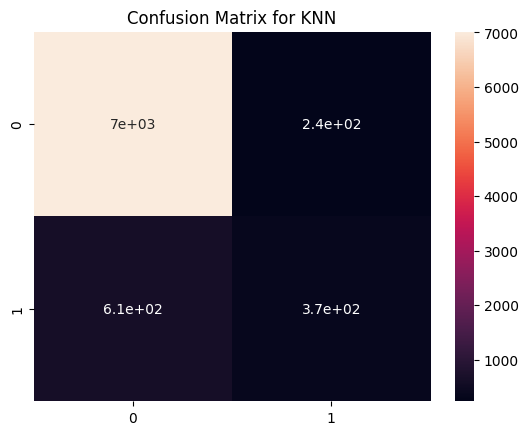

In [84]:
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True)
plt.title('Confusion Matrix for KNN')

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 7015 prediksi true negatif
* 613 prediksi false negatif
* 239 prediksi false positif
* 368 prediksi true positif

Hasil Akurasi menggunakan model KNN adalah 89,6539 %

**4.3 Support Vector Machine**

In [85]:
# Modelling
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)

y_pred2 = model_svm.predict(X_test)

In [86]:
# Skor Akurasi
print(accuracy_score(y_test, y_pred2))

0.8868245294474802


In [87]:
# confusion_matrix
matrix = confusion_matrix(y_test, y_pred2)
print(matrix)

[[7141  113]
 [ 819  162]]


In [88]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7254
           1       0.59      0.17      0.26       981

    accuracy                           0.89      8235
   macro avg       0.74      0.57      0.60      8235
weighted avg       0.86      0.89      0.86      8235



Text(0.5, 1.0, 'Confusion Matrix for SVM')

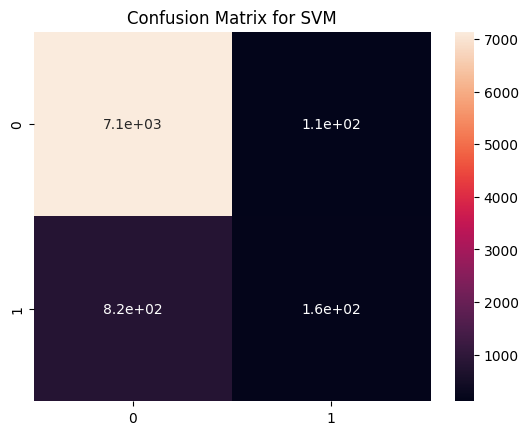

In [89]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True)
plt.title('Confusion Matrix for SVM')

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 7141 prediksi true negatif
* 819 prediksi false negatif
* 113 prediksi false positif
* 162 prediksi true positif

Hasil Akurasi menggunakan model SVM adalah 88,6824 %

**4.4 Decision Tree Classifier**

In [90]:
# Modelling
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred3 = model_dt.predict(X_test)

In [91]:
# Skor Akurasi
print(accuracy_score(y_test, y_pred3))

0.8867030965391621


In [92]:
# confusion_matrix
matrix = confusion_matrix(y_test, y_pred3)
print(matrix)

[[6787  467]
 [ 466  515]]


In [93]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7254
           1       0.52      0.52      0.52       981

    accuracy                           0.89      8235
   macro avg       0.73      0.73      0.73      8235
weighted avg       0.89      0.89      0.89      8235



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

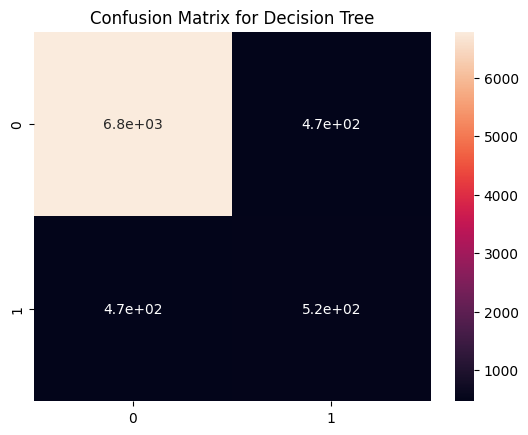

In [94]:
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True)
plt.title('Confusion Matrix for Decision Tree')

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 6787 prediksi true negatif
* 466 prediksi false negatif
* 467 prediksi false positif
* 515 prediksi true positif

Hasil Akurasi menggunakan model Decision Tree adalah 88,6703%

**4.5 Random Forest**

In [95]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred4 = model_rf.predict(X_test)

In [96]:
# Skor Akurasi
print(accuracy_score(y_test, y_pred4))

0.9131754705525197


In [97]:
# confusion_matrix
matrix = confusion_matrix(y_test, y_pred4)
print(matrix)

[[7017  237]
 [ 478  503]]


In [98]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7254
           1       0.68      0.51      0.58       981

    accuracy                           0.91      8235
   macro avg       0.81      0.74      0.77      8235
weighted avg       0.91      0.91      0.91      8235



Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

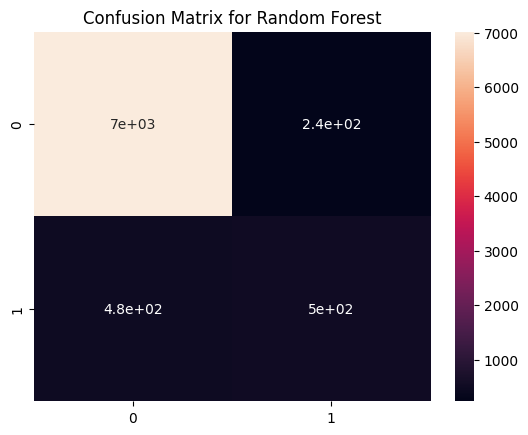

In [99]:
sns.heatmap(confusion_matrix(y_test, y_pred4), annot=True)
plt.title('Confusion Matrix for Random Forest')

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 7017 prediksi true negatif
* 478 prediksi false negatif
* 237 prediksi false positif
* 503 prediksi true positif

Hasil Akurasi menggunakan model Decision Tree adalah 91,3175%

**4.6 Naive Bayes**

In [100]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred5 = model_nb.predict(X_test)

In [101]:
# Skor Akurasi
print(accuracy_score(y_test, y_pred5))

0.8432301153612629


In [102]:
# confusion_matrix
matrix = confusion_matrix(y_test, y_pred5)
print(matrix)

[[6354  900]
 [ 391  590]]


Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes')

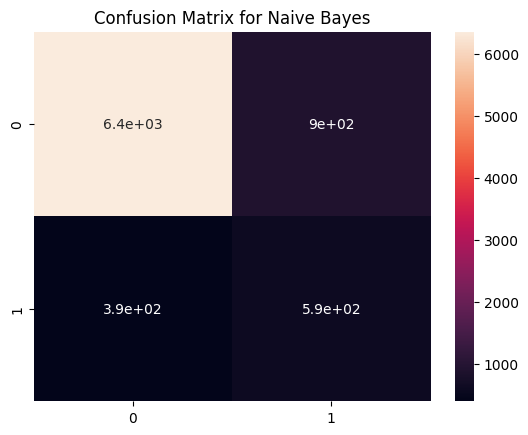

In [103]:
sns.heatmap(confusion_matrix(y_test, y_pred5), annot=True)
plt.title('Confusion Matrix for Naive Bayes')

Matriks yang diperoleh menunjukkan hasil sebagai berikut:

* 6354 prediksi true negatif
* 391 prediksi false negatif
* 900 prediksi false positif
* 590 prediksi true positif

Hasil Akurasi menggunakan model Naive Bayes adalah 84,3230 %

# **5. Overall Analysis**

In [104]:
lg = accuracy_score(y_test, y_pred)
knn = accuracy_score(y_test, y_pred1)
svm = accuracy_score(y_test, y_pred2)
dt = accuracy_score(y_test, y_pred3)
rf = accuracy_score(y_test, y_pred4)
nb = accuracy_score(y_test, y_pred5)

In [105]:
print("Nilai akurasi Logistic Regression:", lg)
print("Nilai akurasi KNN:", knn)
print("Nilai akurasi SVM:", svm)
print("Nilai akurasi Decision Tree:", dt)
print("Nilai akurasi Random Forest:", rf)
print("Nilai akurasi Naive Bayes:", nb)

Nilai akurasi Logistic Regression: 0.9063752276867031
Nilai akurasi KNN: 0.8965391621129326
Nilai akurasi SVM: 0.8868245294474802
Nilai akurasi Decision Tree: 0.8867030965391621
Nilai akurasi Random Forest: 0.9131754705525197
Nilai akurasi Naive Bayes: 0.8432301153612629


kesimpulan  :


1.  Permodelan dengan tingkat nilai akurasi terbaik yaitu pemodelan dengan menggunakan algoritma Random Forest dengan nilai akurasi 91,3175 %
2.  Permodelan dengan tingkat nilai akurasi terburuk yaitu pemodelan dengan menggunakan algoritma Naive Bayes dengan nilai akurasi 84,3230 %

